<a href="https://colab.research.google.com/github/ravivarmakumar/INFO-5505-Spring-2022/blob/main/RaviVarmaKumarBevara_INFO5505_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-5505 Applied Machine Learning for Data Scientists


### Assignment 1 - Linear Regression


- Name: Ravi Varma Kumar Bevara
- Student ID : 11476678

**Regression**
<font color='red'>
> It is a problem of predicting a real-valued label i.e., target in the machine learning algorithm, given an unlabeled example. Predciting the price of a product based on past year sales, such as number of purchases, reviews data, product features and so on is an example of regression.
<br />
</font>

* Linear Regression - It is a popukar regression learning algorithm that learns a model which is a linear combination of features of the input example.

  - Mathematically, it can replicated "y=ax+b" 
  - We need to find the optimal values of a,b from the labeled training data.
  - Obviously, the optimal values of parameters define the model that makes the most accurate predictions.

* All-model based algorithms have a loss functions and what we do to find the best model is we try to minimize the objective known as the cost function. In this algorithm, the cost function is given by average loss, also called as emprical risk.

#### Importing Libraries

#
<font color="blue">
As the python is the primary language I chose to execute this model, I tried to explore all the libraries related to exploratory data analysis. Numpy is the module we use for mathematical analysis related to dataset such as getting null values, changing the shape of input array to the model. Pandas being the best model for data manipulation, which is highly compactable with NumPy module. For supporting the data analysis, I choose the two popular libraries matplotlib, and seaborn for appropriate visualizations.
</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For the dataset, I decided to save the data on the cloud which is google drive, It would be compactable with google cloab

####Mounting my google drive for the dataset access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rawdata = pd.read_csv('drive/MyDrive/INFO5505-Spring2022/monet.csv')

####Exploratory Data Analysis

<font color='seagreen'>

* It is exploring the data to better understand the data, like extraxting or transforming input variabeles.
* Indetifyiing outliers, missing values, and human errors in the data.
* Understanding the relation between each variable, alongside observing how each variables is distributed along thhe path of data provided.
</font>

In [ ]:
rawdata.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [ ]:
rawdata.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [ ]:
rawdata.shape

(430, 6)

In [ ]:
rawdata.columns

Index(['PRICE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE '], dtype='object')

#
<font color="blue">
So, I could see that from the columns names, HOUSE column has a space within the column name, so I decided to rename the column and remove the columns which are not necessary for my analysis.
</font>

In [ ]:
rawdata = rawdata.rename(columns = {"HOUSE ":"HOUSE"},errors = "raise")

In [ ]:
cleandata = rawdata.copy().drop(['SIGNED','PICTURE','HOUSE'],axis=1)
cleandata

,PRICE,HEIGHT,WIDTH
0,3.993780,21.3,25.6
1,8.800000,31.9,25.6
2,0.131694,6.9,15.9
3,2.037500,25.7,32.0
4,1.487500,25.7,32.0
...,...,...,...
425,5.282500,25.6,39.4
426,9.352500,25.9,39.6
427,8.252500,25.6,39.6
428,3.410000,25.6,39.4


#
<font color="blue">
For dealing with null values, I choose to drop them, and compare the number of obervations in the dataset. If both are same, then it would be appear so there are no null values in the data.
</font>

In [ ]:
cleandata.dropna(axis=0)

,PRICE,HEIGHT,WIDTH
0,3.993780,21.3,25.6
1,8.800000,31.9,25.6
2,0.131694,6.9,15.9
3,2.037500,25.7,32.0
4,1.487500,25.7,32.0
...,...,...,...
425,5.282500,25.6,39.4
426,9.352500,25.9,39.6
427,8.252500,25.6,39.6
428,3.410000,25.6,39.4


####Correlation Matrix

#
<font color="red">
For exploring how the attributes of dataset are behaving among themselves, with each other attributes, I used correaltion matrix concept from statistics which will result me all the correaltion coefficients. In detail, it is a table which shows the correaltion between varibales.
</font>

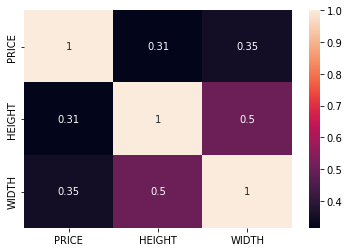

In [ ]:
cor = cleandata.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot =True)
cmap = sns.diverging_palette(220,20, as_cmap = True)

#
<font color="blue">
After examining the correaltion matrix, I decided to plot the data in steps of each variable vs the other variables of the dataset.

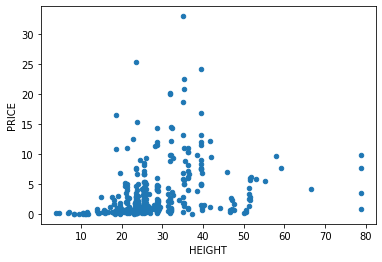

In [ ]:
cleandata.plot(kind ='scatter', x='HEIGHT', y='PRICE')

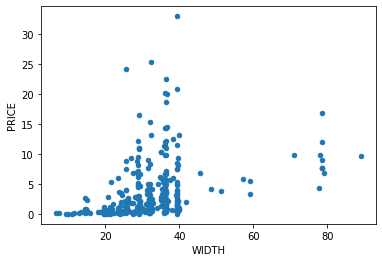

In [ ]:
cleandata.plot(kind ='scatter', x='WIDTH', y='PRICE')

####Exploring patterns or trends in the independent variables

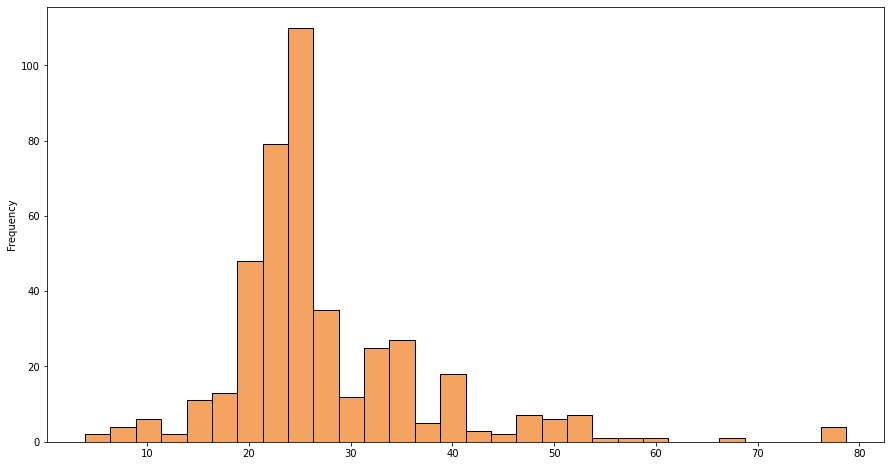

In [ ]:
cleandata['HEIGHT'].plot(kind='hist',bins=30,figsize=(15,8),facecolor='sandybrown',edgecolor='black')

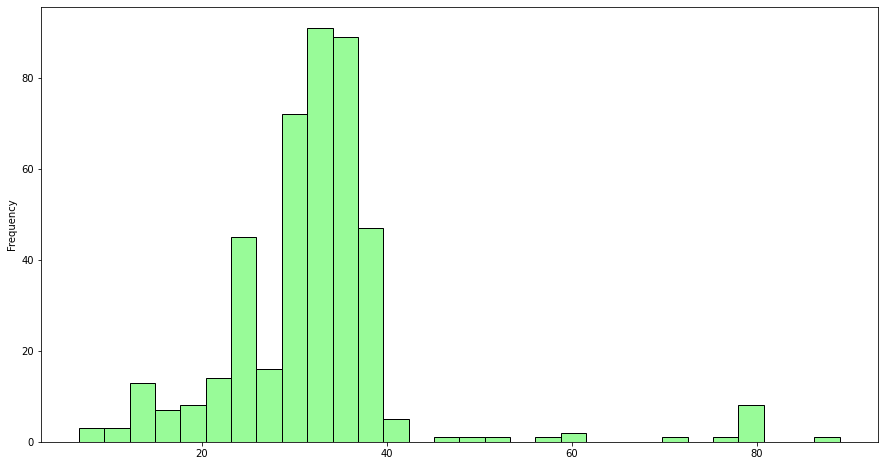

In [ ]:
cleandata['WIDTH'].plot(kind='hist',bins=30,figsize=(15,8),facecolor='palegreen',edgecolor='black')

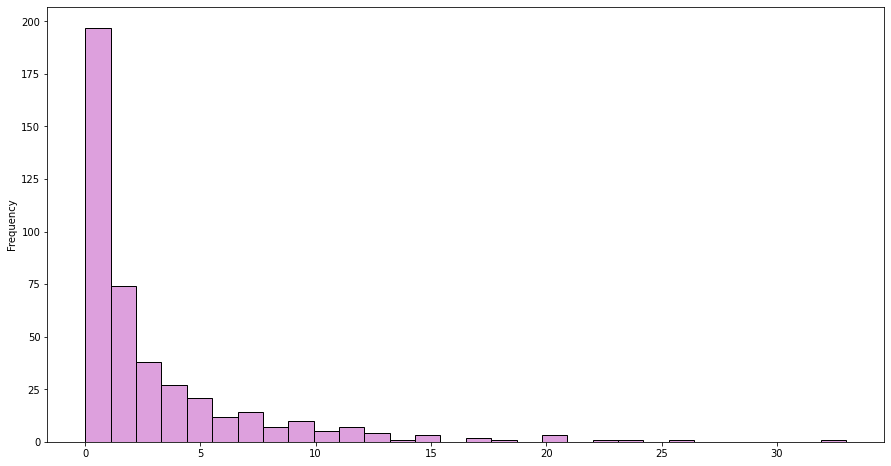

In [ ]:
cleandata['PRICE'].plot(kind='hist',bins=30,figsize=(15,8),facecolor='plum',edgecolor='black')

####Creating new variable 'size' from the existing independent varibales

In [ ]:
cleandata["SIZE"] = cleandata["HEIGHT"]*cleandata["WIDTH"]

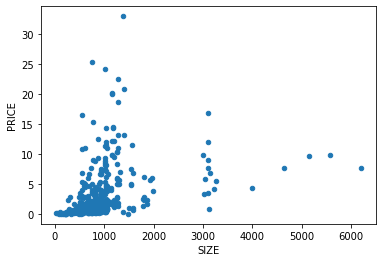

In [ ]:
cleandata.plot(kind ='scatter', x='SIZE', y='PRICE')

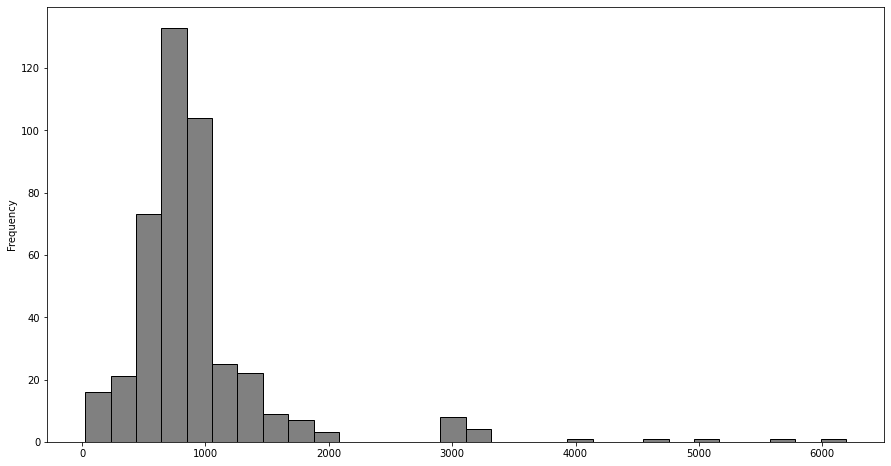

In [ ]:
cleandata['SIZE'].plot(kind='hist',bins=30,figsize=(15,8),facecolor='grey',edgecolor='black')

In [ ]:
cleandata.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
PRICE,2.840902,10.598796
HEIGHT,1.832789,6.131083
WIDTH,2.055290,8.952752
SIZE,3.896801,20.714433


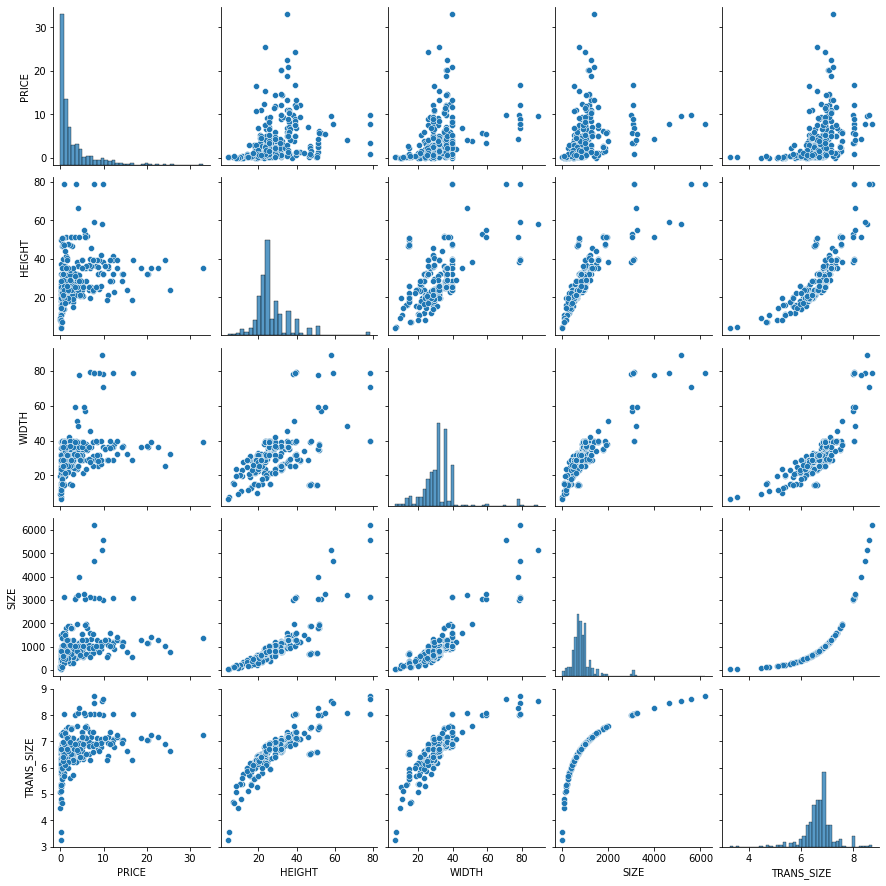

In [ ]:
sns.pairplot(cleandata)

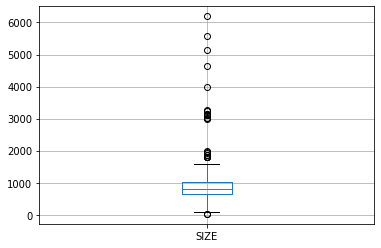

In [ ]:
cleandata.boxplot(["SIZE"])

#### Applying Log Transformation to the new variable "size"

In [ ]:
cleandata['TRANS_SIZE'] = np.log(cleandata['SIZE'])

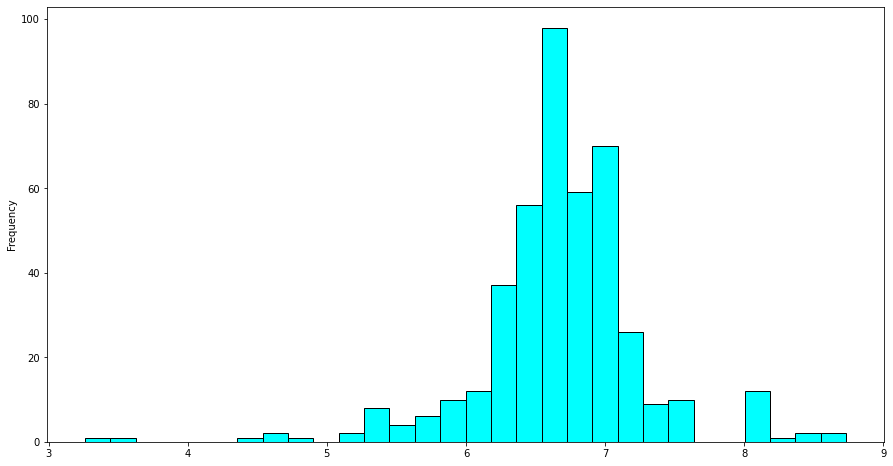

In [ ]:
cleandata['TRANS_SIZE'].plot(kind='hist',bins=30,figsize=(15,8),facecolor='cyan',edgecolor='black')

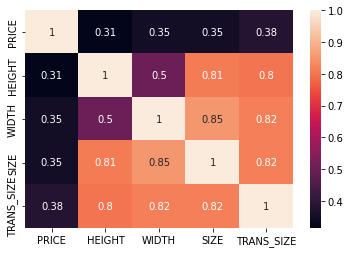

In [ ]:
corr = cleandata.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot =True)
cmap = sns.diverging_palette(220,20, as_cmap = True)

In [ ]:
cleandata.describe()

,PRICE,HEIGHT,WIDTH,SIZE,TRANS_SIZE
count,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,940.811558,6.680066
std,4.311260,10.097013,10.459677,676.539289,0.588091
min,0.010413,3.900000,6.700000,26.130000,3.263084
25%,0.600153,23.125000,28.525000,637.902500,6.458185
50%,1.312782,25.600000,31.900000,816.640000,6.705198
75%,3.850000,31.450000,36.200000,1036.605000,6.943699
max,33.013504,78.700000,89.000000,6193.690000,8.731286


In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

####Simple Linear Regression Model-1

In [ ]:
y = cleandata['PRICE'].values.reshape(-1,1)
x = cleandata[['HEIGHT']].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
simplelinearmodel1 = linear_model.LinearRegression()
simplelinearmodel1.fit(x_train, y_train)
predicted_y = simplelinearmodel1.predict(x_test)

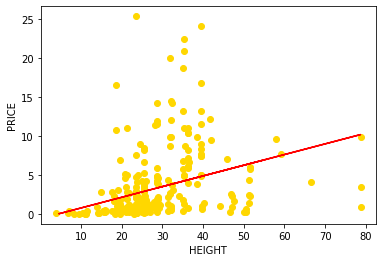

In [ ]:
plt.scatter(x_train, y_train, color = 'gold')
plt.plot(x_test, predicted_y, color = 'red')
plt.xlabel("HEIGHT")
plt.ylabel("PRICE")
plt.show()

In [ ]:
print("The intercept of the linear model is,"+str(simplelinearmodel1.intercept_)+" and the coefficient is,"+str(simplelinearmodel1.coef_[0]))

The intercept of the linear model is,[-0.59779596] and the coefficient is,[0.13730289]


In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predicted_y)
rmse = metrics.mean_squared_error(y_test, predicted_y)
r2 = metrics.r2_score(y_test, predicted_y)
print("Mean Absolute Error :" , mean_absolute_error)
print("Root Mean Square Error :" , rmse)
print("R Square Error:", r2)

Mean Absolute Error : 2.355755309349786
Root Mean Square Error : 15.612011205167573
R Square Error: 0.06883002841152508


####Simple Linear Regression Model-2

In [ ]:
y = cleandata['PRICE'].values.reshape(-1,1)
x = cleandata[['WIDTH']].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
simplelinearmodel2 = linear_model.LinearRegression()
simplelinearmodel2.fit(x_train, y_train)
predicted_y = simplelinearmodel2.predict(x_test)

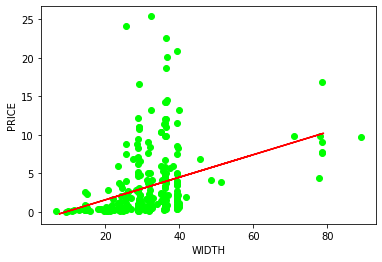

In [ ]:
plt.scatter(x_train, y_train, color = 'lime')
plt.plot(x_test, predicted_y, color = 'red')
plt.xlabel("WIDTH")
plt.ylabel("PRICE")
plt.show()

In [ ]:
print("The intercept of the linear model is,"+str(simplelinearmodel2.intercept_)+" and the coefficient is,"+str(simplelinearmodel2.coef_[0]))

The intercept of the linear model is,[-1.39024506] and the coefficient is,[0.14670865]


In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predicted_y)
rmse = metrics.mean_squared_error(y_test, predicted_y)
r2 = metrics.r2_score(y_test, predicted_y)
print("Mean Absolute Error :" , mean_absolute_error)
print("Root Mean Square Error :" , rmse)
print("R Square Error:", r2)

Mean Absolute Error : 2.487673225425967
Root Mean Square Error : 15.306773245853007
R Square Error: 0.08703578154399716


####Simple Linear Regression Model-3

In [ ]:
y = cleandata['PRICE'].values.reshape(-1,1)
x = cleandata[['SIZE']].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
simplelinearmodel3 = linear_model.LinearRegression()
simplelinearmodel3.fit(x_train, y_train)
predicted_y = simplelinearmodel3.predict(x_test)

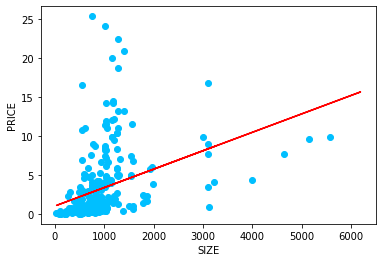

In [ ]:
plt.scatter(x_train, y_train, color = 'deepskyblue')
plt.plot(x_test, predicted_y, color = 'red')
plt.xlabel("SIZE")
plt.ylabel("PRICE")
plt.show()

In [ ]:
print("The intercept of the linear model is,"+str(simplelinearmodel3.intercept_)+" and the coefficient is,"+str(simplelinearmodel3.coef_[0]))

The intercept of the linear model is,[1.02570299] and the coefficient is,[0.00236759]


In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predicted_y)
rmse = metrics.mean_squared_error(y_test, predicted_y)
r2 = metrics.r2_score(y_test, predicted_y)
print("Mean Absolute Error :" , mean_absolute_error)
print("Root Mean Square Error :" , rmse)
print("R Square Error:", r2)

Mean Absolute Error : 2.4024378443329524
Root Mean Square Error : 15.45121620702567
R Square Error: 0.07842055918194912


####Simple Linear Regression Model-4

In [ ]:
y = cleandata['PRICE'].values.reshape(-1,1)
x = cleandata[['TRANS_SIZE']].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
simplelinearmodel4 = linear_model.LinearRegression()
simplelinearmodel4.fit(x_train, y_train)
predicted_y = simplelinearmodel4.predict(x_test)

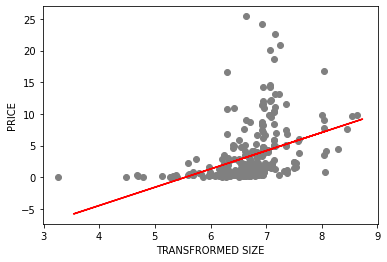

In [ ]:
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, predicted_y, color = 'red')
plt.xlabel("TRANSFRORMED SIZE")
plt.ylabel("PRICE")
plt.show()

In [ ]:
print("The intercept of the linear model is,"+str(simplelinearmodel4.intercept_)+" and the coefficient is,"+str(simplelinearmodel4.coef_[0]))

The intercept of the linear model is,[-15.9900074] and the coefficient is,[2.88328553]


In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predicted_y)
rmse = metrics.mean_squared_error(y_test, predicted_y)
r2 = metrics.r2_score(y_test, predicted_y)
print("Mean Absolute Error :" , mean_absolute_error)
print("Root Mean Square Error :" , rmse)
print("R Square Error:", r2)

Mean Absolute Error : 2.4608447181601356
Root Mean Square Error : 15.184700861955218
R Square Error: 0.09431672291356374


####Simple Linear Regression Model-5

In [ ]:
cleandata1 = cleandata.copy()

In [ ]:
cleandata1['TRANS_PRICE'] = np.log(cleandata1['PRICE'])

In [ ]:
y = cleandata1['TRANS_PRICE'].values.reshape(-1,1)
x = cleandata[['TRANS_SIZE']].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
simplelinearmodel5 = linear_model.LinearRegression()
simplelinearmodel5.fit(x_train, y_train)
predicted_y = simplelinearmodel5.predict(x_test)

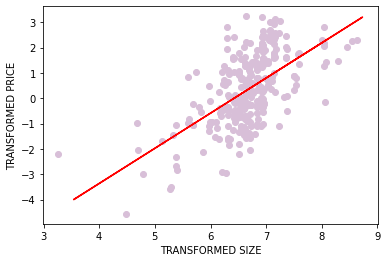

In [ ]:
plt.scatter(x_train, y_train, color = 'thistle')
plt.plot(x_test, predicted_y, color = 'red')
plt.xlabel("TRANSFORMED SIZE")
plt.ylabel("TRANSFORMED PRICE")
plt.show()

In [ ]:
print("The intercept of the linear model is,"+str(simplelinearmodel5.intercept_)+" and the coefficient is,"+str(simplelinearmodel5.coef_[0]))

The intercept of the linear model is,[-8.91293338] and the coefficient is,[1.38742667]


In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predicted_y)
rmse = metrics.mean_squared_error(y_test, predicted_y)
r2 = metrics.r2_score(y_test, predicted_y)
print("Mean Absolute Error :" , mean_absolute_error)
print("Root Mean Square Error :" , rmse)
print("R Square Error:", r2)

Mean Absolute Error : 0.8010582386764501
Root Mean Square Error : 1.1330512414530571
R Square Error: 0.25775867794810714


####Using 'statsmodels' to compare the best model from 'sklearn'

In [ ]:
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [ ]:
parameters = api.add_constant(cleandata1.TRANS_SIZE)
olslinearmodel = api.OLS(cleandata1.TRANS_PRICE, parameters).fit()
olslinearmodel.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TRANS_PRICE   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.27e-39
Time:                        02:35:48   Log-Likelihood:                -651.51
No. Observations:                 430   AIC:                             1307.
Df Residuals:                     428   BIC:                             1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5256      0.608    -14.033      0.000      -9.720      -7.331
TRANS_SIZE     1.3261      0.091     14.637      0.000       1.148       1.504
==============================================================================
Omnibus:                        0.552   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.356
Skew:                           0.001   Prob(JB):                        0.837
Kurtosis:                       3.141   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def MLE(parameters):
  bias, slope, sd = parameters
  prediction = bias + slope*cleandata1.TRANS_SIZE
  prob = np.sum(stats.norm.logpdf(cleandata1.TRANS_PRICE, prediction, sd))
  negprob = -1*prob
  return negprob

mlelinearmodel = minimize(MLE, np.array([2,2,2]), method='L-BFGS-B')
mlelinearmodel

      fun: 651.5056005319066
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00025011,  0.00059117, -0.00097771])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 112
      nit: 25
   status: 0
  success: True
        x: array([-8.52553879,  1.32607642,  1.10096769])

####Multiple Linear Regression

In [ ]:
normalisedata = cleandata.copy()

In [ ]:
normalisedata = normalisedata.drop(['WIDTH','PRICE','SIZE'],axis=1)

In [ ]:
normalisedata = (normalisedata - normalisedata.mean())/normalisedata.std()
normalisedata.describe()

,HEIGHT,TRANS_SIZE
count,4.300000e+02,4.300000e+02
mean,-2.272794e-15,-3.059197e-15
std,1.000000e+00,1.000000e+00
min,-2.351881e+00,-5.810292e+00
25%,-4.478529e-01,-3.772893e-01
50%,-2.027309e-01,4.273549e-02
75%,3.766483e-01,4.482852e-01
max,5.056250e+00,3.487928e+00


In [ ]:
y = cleandata['PRICE'].values
x = normalisedata[['HEIGHT','TRANS_SIZE']].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
multilinearmodel = linear_model.LinearRegression()
multilinearmodel.fit(x_train, y_train)
predicted_y = multilinearmodel.predict(x_test)

In [ ]:
multilinearmodel.intercept_

3.265434758022821

In [ ]:
multilinearmodel.coef_

array([0.10969073, 1.60769129])

In [ ]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predicted_y)
rmse = metrics.mean_squared_error(y_test, predicted_y)
r2 = metrics.r2_score(y_test, predicted_y)
print("Mean Absolute Error :" , mean_absolute_error)
print("Root Mean Square Error :" , rmse)
print("R Square Error:", r2)

Mean Absolute Error : 2.4492930220539546
Root Mean Square Error : 15.16855581153919
R Square Error: 0.09527968572082923
